Coursera_capstone Project

## Table of contents
* [Introduction: Business Problem/challenge](#introduction)
* [Data](#data)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

 ## Introduction: Business Problem/Challenge <a Business problem="introduction"></a>

The focus of this capstone project will be zika virus and its prevalence in Venezula ,Brazil and Coloumbia. This report will target Non-profits and healthcare researchers who mostly want to help eradicate this virus despite that Zika Virus is not widely spread nowadays. Here's some useful read about Zika Virus;

 https://www.iamat.org/country/venezuela/risk/zika-virus 
 
https://www.healio.com/news/infectious-disease/20180104/venezuela-case-suggests-zika-virus-transmitted-through-breastfeeding:text=Venezuela%20has%20a%20history%20of,bite%20measures%20during%20the%20daytime.

https://www.cdc.gov/pregnancy/zika/testing-follow-up/zika-in-infants-children.html

https://www.statista.com/statistics/1006908/venezuela-zika-virus-cases/

Data Science will try to support non-profits and volunnteers efforts to cluster their efforts in countries like Venezuela,Brazil and Coloumbia

Data Sources:
https://www.dataquest.io/blog/free-datasets-for-projects/

https://github.com/BuzzFeedNews/zika-data

https://www.kaggle.com/cdc/zika-virus-epidemic


In [58]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [59]:
df=pd.read_csv('paho-who-cases-reported-latest.csv')
df.head(50)

,Country / territory,Measure Names,Month of Date,Report Epi Week,Year of Date,Country / territory.1,Date,Measure Values,Laboratory confirmed cases,Suspected cases
0,Aruba,Suspected,January,1,2016,Aruba,"January, 2016",0,0,0
1,Aruba,Confirmed,January,1,2016,Aruba,"January, 2016",0,0,0
2,Aruba,Suspected,January,2,2016,Aruba,"January, 2016",0,0,0
3,Aruba,Confirmed,January,2,2016,Aruba,"January, 2016",0,0,0
4,Aruba,Suspected,January,3,2016,Aruba,"January, 2016",0,0,0
5,Aruba,Confirmed,January,3,2016,Aruba,"January, 2016",0,0,0
6,Aruba,Suspected,January,4,2016,Aruba,"January, 2016",0,0,0
7,Aruba,Confirmed,January,4,2016,Aruba,"January, 2016",0,0,0
8,Barbados,Suspected,January,1,2016,Barbados,"January, 2016",0,3,0
9,Barbados,Confirmed,January,1,2016,Barbados,"January, 2016",3,3,0


In [60]:
df.tail(30)

,Country / territory,Measure Names,Month of Date,Report Epi Week,Year of Date,Country / territory.1,Date,Measure Values,Laboratory confirmed cases,Suspected cases
1186,Trinidad and Tobago,Suspected,December,48,2015,Trinidad and Tobago,"December, 2015",0,0,0
1187,Trinidad and Tobago,Confirmed,December,48,2015,Trinidad and Tobago,"December, 2015",0,0,0
1188,Trinidad and Tobago,Suspected,December,49,2015,Trinidad and Tobago,"December, 2015",0,0,0
1189,Trinidad and Tobago,Confirmed,December,49,2015,Trinidad and Tobago,"December, 2015",0,0,0
1190,Trinidad and Tobago,Suspected,December,50,2015,Trinidad and Tobago,"December, 2015",0,0,0
1191,Trinidad and Tobago,Confirmed,December,50,2015,Trinidad and Tobago,"December, 2015",0,0,0
1192,Trinidad and Tobago,Suspected,December,51,2015,Trinidad and Tobago,"December, 2015",0,0,0
1193,Trinidad and Tobago,Confirmed,December,51,2015,Trinidad and Tobago,"December, 2015",0,0,0
1194,Trinidad and Tobago,Suspected,December,52,2015,Trinidad and Tobago,"December, 2015",0,0,0
1195,Trinidad and Tobago,Confirmed,December,52,2015,Trinidad and Tobago,"December, 2015",0,0,0


In [61]:
df.shape

(1216, 10)

In [62]:
# define the dataframe columns
column_names = ['Country / territory', 'Suspected cases', 'Measure Values', 'Date'] 

# instantiate the dataframe
df_new = pd.DataFrame(columns=column_names)

In [63]:
df_new

,Country / territory,Suspected cases,Measure Values,Date


In [64]:
df['Suspected cases'].value_counts()

0        1032
3           6
2           4
59          4
115         4
1,452       2
1,550       2
96          2
487         2
130         2
4,693       2
360         2
5,737       2
44          2
185         2
55          2
4           2
5,695       2
82          2
247         2
37          2
39          2
362         2
316         2
1,777       2
312         2
61          2
195         2
1,064       2
29          2
1,451       2
5           2
278         2
422         2
1,065       2
204         2
1,119       2
71          2
14          2
753         2
452         2
785         2
7           2
375         2
1,363       2
46          2
348         2
1,436       2
741         2
1,645       2
846         2
492         2
13          2
608         2
168         2
1,069       2
77          2
661         2
200         2
89          2
150         2
464         2
3,626       2
2,866       2
62          2
78          2
1           2
6           2
28          2
221         2
1,046       2
277   

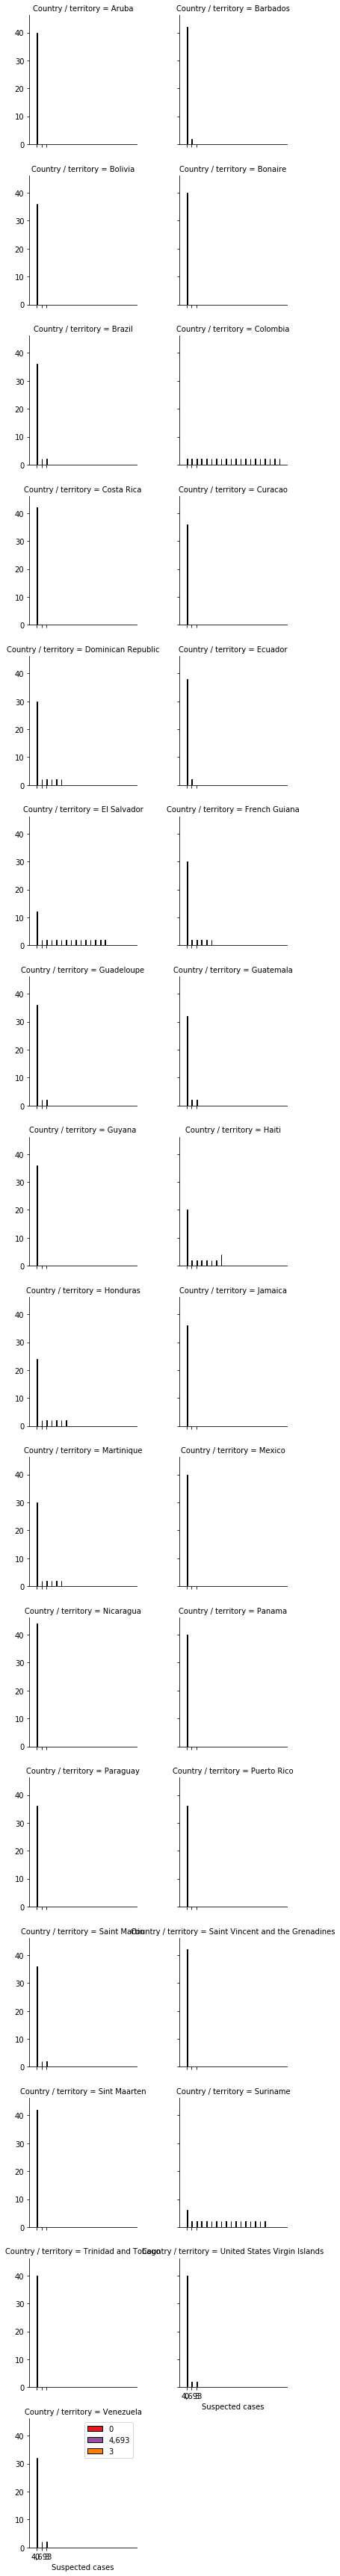

In [65]:
import seaborn as sns

bins = np.linspace
g = sns.FacetGrid(df, col="Country / territory", hue="Suspected cases", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Suspected cases', ec="k")

g.axes[-1].legend()
plt.show()

From the data above, we can understand that venezuela suspected cases are the highest followed by Brazil and coloumbia. Therefore, now we are going to visulaize Venezula map and compare Brazilas and coloumbia disease prevalence using Foursquare

In [66]:
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

! pip install folium
import folium

In [68]:
address = 'venezuela'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of venezuela are {}, {}.'.format(latitude, longitude))

F:\Downloads\Python3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of venezuela are 8.0018709, -66.1109318.


In [69]:
map_venezuela = folium.Map(location=[latitude, longitude], zoom_start=10)
map_venezuela

In [70]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_state)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
       
map_clusters

In [71]:
df.loc

In [72]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [73]:
CLIENT_ID = 'PLDXYU15TYKFGUXYORTWLRFTLLZURFF4NWUT0IZCRTDEDXHQ' # your Foursquare ID
CLIENT_SECRET = 'GV3B1JDPZAUGDNSD4WMKB4RCHODCJNGYSM12WXXLWJ4N40KW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: PLDXYU15TYKFGUXYORTWLRFTLLZURFF4NWUT0IZCRTDEDXHQ
CLIENT_SECRET:GV3B1JDPZAUGDNSD4WMKB4RCHODCJNGYSM12WXXLWJ4N40KW


In [74]:
address = 'Brazil'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brazil are {}, {}.'.format(latitude, longitude))

F:\Downloads\Python3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Brazil are -10.3333333, -53.2.


In [75]:
map_Brazil = folium.Map(location=[latitude, longitude], zoom_start=10)
map_Brazil

In [76]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_state)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 3, 0, 3, 3, 2, 2, 0])

In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
       
map_clusters

In [78]:
df_Brazil=pd.read_csv('brazil-microcephaly-2016-01-30-table-1.csv')
df_Brazil.head()

,no,state,cases_under_investigation,cases_confirmed,cases_discarded,cases_reported_total
0,1,Alagoas,104,15,66,185
1,2,Bahia,508,99,46,653
2,3,Ceará,234,7,10,251
3,4,Maranhão,132,0,16,148
4,5,Paraíba,460,37,253,750


In [79]:
# group countries by continents and apply sum() function 
df_state = df_Brazil.groupby('cases_reported_total', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_Brazil.groupby('state', axis=0)))

df_state.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,no
cases_reported_total,
1,71
10,25
101,20
103,7
126,13


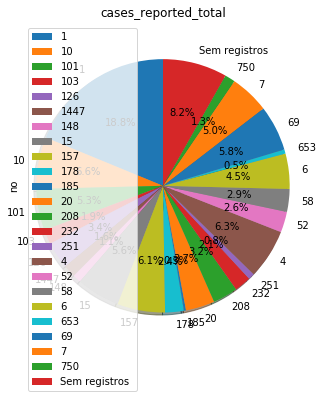

In [80]:
# autopct create %, start angle represent starting point
df_state.plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            subplots=True)

plt.title('cases_reported_total')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

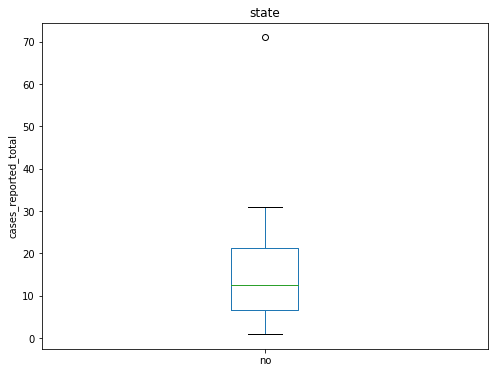

In [81]:
df_state.plot(kind='box', figsize=(8, 6))

plt.title('state')
plt.ylabel('cases_reported_total')

plt.show()

In [82]:
df_state.describe

<bound method NDFrame.describe of                       no
cases_reported_total    
1                     71
10                    25
101                   20
103                    7
126                   13
1447                   6
148                    4
15                    21
157                   23
178                    9
185                    1
20                    14
208                   12
232                    8
251                    3
4                     24
52                    10
58                    11
6                     17
653                    2
69                    22
7                     19
750                    5
Sem registros         31>

In [83]:
map_Brazil

In [84]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_state)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 3, 0, 3, 3, 2, 2, 0])

In [85]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
       
map_clusters

In [86]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(['-10.3333333'], ['-53.2'], ['Neighborhood'], ['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

From above data, we can observe that Pernambuco, Brasilia Neighboorhood is higest in total reported cases and most efforts should be there